<a href="https://colab.research.google.com/github/simoncellia/Proyecto_Tec_12/blob/main/Espiral_2_GCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando una espiral en Python
Vamos a aprender a generar una espiral usando Python. Para comprender cómo funciona, primero necesitamos recordar cómo describir un círculo. Imagina que un círculo tiene un radio que cambia de manera uniforme. Esa es la idea básica detrás de una espiral.

Para generar un círculo, usamos las siguientes fórmulas, donde $r$ es el radio y $\theta$ es el ángulo (en radianes):

$$x=r \cdot \cos(\theta)$$
$$y=r \cdot \sin(\theta)$$


Estas formulas nos dan las coordenadas $x$ e $y$ de los puntos que forman el circulo si variamos $\theta$ de 0 a $2\pi$.

Ahora, si en lugar de mantener el radio constante, hacemos que el radio $r$ cambie a medida que aumentamos $\theta$, obtendremos una espiral. Específicamente, podemos hacer que el radio disminuya gradualmente para que la espiral se enrosque hacia adentro.


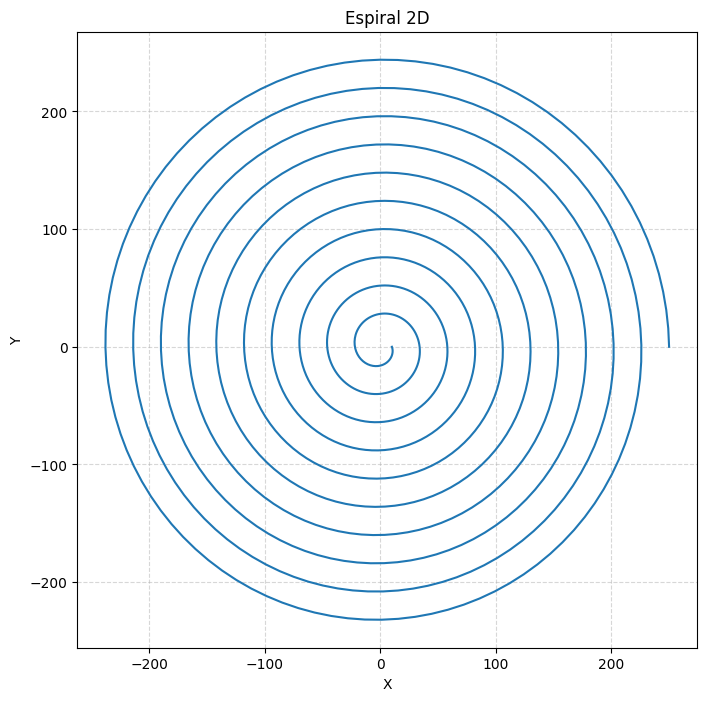

In [9]:
import numpy as np
import matplotlib.pyplot as plt

vueltas= 10
r_inicial= 250
r_final=10

theta=np.linspace(0,2*np.pi*vueltas,1000)
radio=np.linspace(r_inicial, r_final, len(theta))

x=radio*np.cos(theta)
y=radio*np.sin(theta)

fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño de la figura

# Graficar la espiral
ax.plot(x, y)

ax.set_title('Espiral 2D')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Agregar una cuadrícula suave
ax.grid(True, linestyle='--', alpha=0.5)


con:
`theta = np.linspace(0, 2 * np.pi * vueltas, 1000)` Generamos un conjunto de valores para el ángulo
$\theta$, que va desde $0$ hasta $2\pi$ multiplicado por el número de vueltas que queremos dar a la espiral.

`radio = np.linspace(r_inicial, r_final, len(theta))`: Creamos un conjunto de valores para el radio que va desde el valor inicial $r_{inicial}$ hasta el valor $r_{final}$. La cantidad de elemetos de este vector considira con la cantidad de elementos qeu tenga nuestro vector $\theta$.

# Moviendonos a 3D.
Pesando de la misma manera que antes... al realizar pequeños incrementos de radio. ¿Qué obtendriamos si realizamos pequeños incremntos en una nueva coordenada Z?

Un cono! claro! pasemos a la tercera dimenisión notaremos lo intuitivo qeu resulta esto!


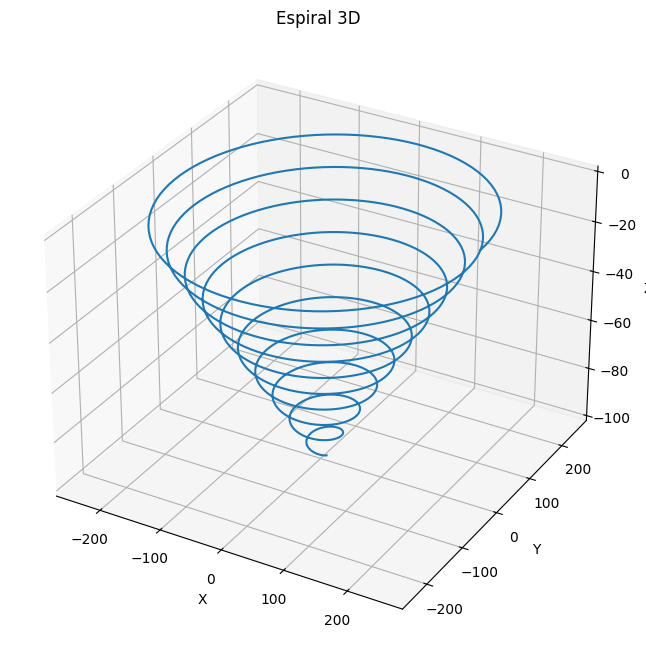

In [10]:
z=np.linspace(0,-100,len(theta))

fig = plt.figure(figsize=(8, 8))  # Ajustamos el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Especificamos que será un gráfico 3D

# Graficar la espiral 3D
ax.plot(x, y, z)

# Configuramos el título y los ejes
ax.set_title('Espiral 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la gráfica
plt.show()

observemos que hay en los primeros valores x, y, z...

In [23]:
print(f"x {x[0:5].round(2)}...")
print(f"y {y[0:5].round(2)}...")
print(f"z {z[0:5].round(2)}...")

x [250.   249.27 247.55 244.86 241.2 ]...
y [ 0.   15.7  31.3  46.76 61.99]...
z [ 0.  -0.1 -0.2 -0.3 -0.4]...


Lo que conseguimos aqui es un cojunto de puntos x y z que definine la trayectoria deseada, si ya tienen experiencia con equipos CNC o impresoras 3D estos les tendría que resultar familiar, ya que es el mismo principio con el que se les indican los lugares a los que tienen que ir estos equipos! mediante el conocido codigo **ISO-G**.

Este código empleado para programar maquinas, tiene la particularidad de instrucción por instrucción indicar las coordenadas a las que se moverá la herramieta con movimientos lineales (G00 Y G01) ó circulares (G02 y G03).

entonces si quisieramos que la trayectoría que describimos previamente se se genere en un codigo con el estandar ISO-G bastaría con crear un codigo como el siguiente.

In [24]:
# Crear el archivo G-Code a partir de los puntos del espiral
filename = "espiral_3D.gcode"

with open(filename, "w") as file:
    file.write("G21 ; Configurar unidades a milímetros\n")
    file.write("G90 ; Usar posicionamiento absoluto\n\n")

    for xi, yi, zi in zip(x, y, z):
        file.write(f"G1 X{xi:.4f} Y{yi:.4f} Z{zi:.4f}\n")

print(f"Archivo G-Code generado: {filename}")



Archivo G-Code generado: espiral_3D.gcode
